# Use perspective transformat to get birdseye view of the track

This notebook shows how to take an undistorted image from the camera of a [donkey car](http://donkeycar.com) and transform its perspective so its like your looking straight down on the track. 

In [1]:
from base import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from barn.cv import FishEyeCamera

In [3]:
fe = FishEyeCamera.load(params_path='/home/wroscoe/code/barn/configs/donkey_camera.json')

R: {}


In [4]:
img = plt.imread('/home/wroscoe/data/diyrobocar_races/2018-05_sea_hackathon/tub_1_18-05-18/1001_cam-image_array_.jpg')
fe.update_img_size(img)

In [5]:
fe._R

array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1.5]])

In [6]:
img_undistorted = fe.undistort(img)

In [7]:
#img = plt.imread('/home/wroscoe/data/camera_calibration/good_calibration/18_cam-image_array_.jpg')

#img = cv2.resize(img, (160, 120))
img_undistorted = fe.undistort(img, R=np.eye(3) * np.array([1,1,1.5]))

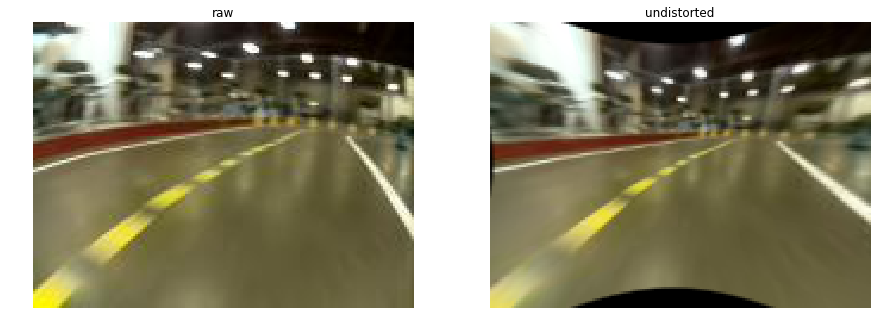

In [8]:

imgs = [{'name': 'raw', 'array': img},
        {'name':'undistorted', 'array': img_undistorted}]

show_imgs(imgs)

In [9]:

src_pts = np.array([[45,109],[63,70],[91,70],[112,109]], np.float32)

half_w = int(15/2)
half_h = int(half_w * 9/7)
center_x, center_y = (80, 100)

dst_pts = np.array([[center_x - half_w, center_y + half_h],
                    [center_x - half_w, center_y - half_h],
                    [center_x + half_w, center_y - half_h],
                    [center_x + half_w, center_y + half_h]], np.float32)

scr_poly = src_pts.reshape((-1,1,2)).astype(np.int)
img_undistorted = cv2.polylines(img_undistorted,[scr_poly],True,(0,255,255))

In [10]:
birdseye = fe.calibrate_birdseye(src_pts, dst_pts)
img_birdseye = fe.birdseye(img_undistorted)

(160, 120)
[[-3.33333333e-01 -1.89194139e+00  1.04769231e+02]
 [ 4.66293670e-15 -2.90293040e+00  1.42538462e+02]
 [ 5.37764278e-17 -2.38095238e-02  1.00000000e+00]]


In [11]:
fe.save('/home/wroscoe/code/barn/configs/donkey_camera.json')

In [10]:
fe2 = FishEyeCamera.load(params_path='/home/wroscoe/test.h5')
img_birdseye = fe2.birdseye(img_undistorted)

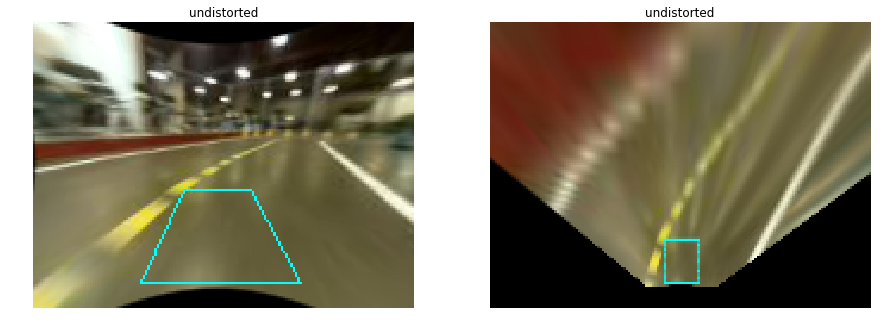

In [11]:
imgs = [{'name':'undistorted', 'array': img_undistorted},
        {'name':'undistorted', 'array': img_birdseye}
       ]
show_imgs(imgs)

In [11]:
img_wh = plt.imread('/home/wroscoe/data/awells_pipesupply_centerline/1000_cam-image_array_.jpg')
img_mf = plt.imread('/home/wroscoe/data/wroscoe_oakmakerfaire_rightlane3/1006_cam-image_array_.jpg')
img_avc = plt.imread('/home/wroscoe/data/wroscoe_avc_raceline2/10055_cam-image_array_.jpg')
img_hive = plt.imread('/home/wroscoe/data/tkramer_hive_cone_avoid2/1002_cam-image_array_.jpg')

for img in [img_wh, img_mf, img_avc, img_hive]:
    img_undistorted = undistort(img)
    img_birdseye = fe.birdseye(img_undistorted)
    show_imgs([
        {'name': 'raw', 'array': img},
        {'name': 'undistort', 'array': img_undistorted},
        {'name': 'birdseye', 'array': img_birdseye}
    ])



FileNotFoundError: [Errno 2] No such file or directory: '/home/wroscoe/data/awells_pipesupply_centerline/1000_cam-image_array_.jpg'

## Next steps
Now that we have a top down view of the track we can find the lanes.

In [12]:
from barn.vision.fisheye import FishEye
fe = FishEye()

In [13]:
fe.__dict__

{'_verbose': False, '_K': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), '_D': array([[0.],
        [0.],
        [0.],
        [0.]]), '_img_shape': None}

In [14]:
p = fe.dump_params()

In [15]:
f = FishEye.load(p)

In [16]:
f.__dict__

{'_verbose': False, '_K': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), '_D': array([[0.],
        [0.],
        [0.],
        [0.]]), '_img_shape': None}

In [17]:
import os
fp = '/home/wroscoe/Desktop/test.json'
fe.save(fp)

In [18]:
import json


In [20]:
with open(fp, 'r') as f:
    d = json.load(f)

In [21]:
d

{'K': [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
 'D': [[0.0], [0.0], [0.0], [0.0]],
 'img_shape': None}

In [26]:

fe = FishEye.load(params_path=fp)

In [24]:
f.__dict__

{'_verbose': False, '_K': array([[0., 3., 0.],
        [3., 0., 0.],
        [3., 0., 0.]]), '_D': array([[0.],
        [0.],
        [0.],
        [0.]]), '_img_shape': None}